In [7]:
import numpy as np
import pandas as pd


df_can = pd.read_excel('datasets/Canada.xlsx',
                          skiprows=range(20),
                          skipfooter=2,
                          sheet_name="Canada by Citizenship")
df_can.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
print(df_can.shape)

(195, 43)


In [9]:
"""lets clean the data to make it easier to create out visualizations"""

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#set country name as index
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
# add total column
df_can['Total'] = df_can.sum(axis=1)

# create array of years
years = list(map(str, range(1980, 2014)))
print('data dimensions: ', df_can.shape)
df_can.head()

data dimensions:  (195, 38)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [13]:
# Visualizing Data

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #optional for ggplot-like style
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  2.2.2


In [14]:
# PieCharts

"""A pie chart is a circualr graphic that displays 
numeric proportions by dividing a circle (or pie) into
proportional slices.

You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently:
.sum()
.count()
.mean() 
.std() 
.aggregate()
.apply()
.etc..

"""


# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

#note: groupby method returns a 'groupby' object to use it further we have to apply a function eg.sum()
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()




<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284


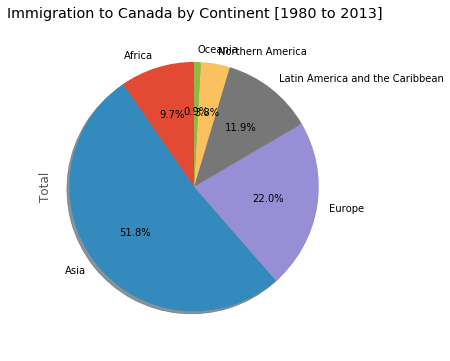

In [18]:
"""
Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
shadow - Draws a shadow beneath the pie (to give a 3D feel)
"""

# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                               figsize=(5,6),
                               autopct='%1.1f%%', # add in percentages,
                               startangle=90, # start angle 90 (Africa),
                               shadow=True)

plt.title('Immigration to Canada by Continent [1980 to 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

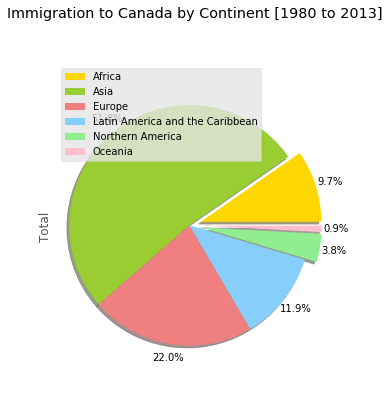

In [19]:
"""
The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
Pass in a custom set of colors for continents by passing in colors parameter.
Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.
"""

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(5,6),
                            autopct="%1.1f%%",
                            shadow=True,
                            labels=None,#turn off labels
                            pctdistance=1.12, # the ratio b/w the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,#add custom colors
                            explode=explode_list # explode lowest 3 continets
                           )
            
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 to 2013]', y=1.12)
plt.axis('equal')

#add legend
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

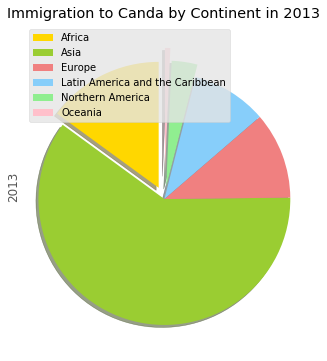

In [22]:
"""
Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

Note: You might need to play with the explore values in order to fix any overlapping slice values.
"""

explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continents[2013].plot(kind='pie',
                          figsize=(5,6),
                          shadow=True,
                          labels=None,
                          startangle=90,
                          pctdistance=1.12,
                          explode=explode_list,
                        colors=colors_list)
plt.title('Immigration to Canda by Continent in 2013')
plt.axis('equal')

plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [44]:
"""
Box Plots 
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

Minimun: Smallest number in the dataset.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: Highest number in the dataset.



To make a box plot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

"""

years = list(range(1980, 2014))
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()



Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


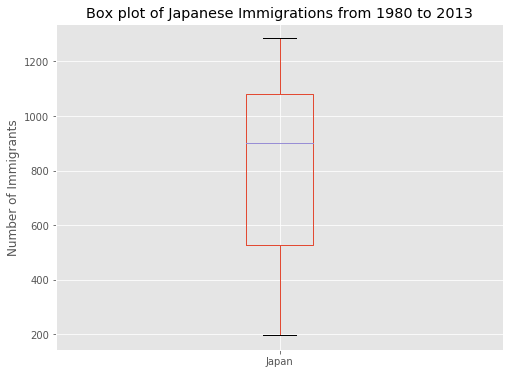

In [45]:
df_japan.plot(kind='box',
             figsize=(8,6))
plt.title('Box plot of Japanese Immigrations from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [47]:
"""
We can immediately make a few key observations from the plot above:

The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).
We can view the actual numbers by calling the describe() method on the dataframe.

One of the key benefits of box plots is comparing the distribution of multiple datasets.
"""



df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [59]:
"""
Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe df_CI.
"""
years = list(range(1980, 2014))
df_CI = df_can.loc[['India', 'China'], years]

In [63]:
df_CI.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,...,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000
std,2656.600177,1405.728281,3421.689714,3871.409627,2953.585025,1693.520741,3669.884194,5335.827771,6197.08383,4256.782823,...,5928.383253,4507.098623,233.345238,777.817459,1255.821643,117.379726,2718.118467,702.157034,1478.560279,736.805266
min,5123.000000,6682.000000,3308.000000,1863.000000,1527.000000,1816.000000,1960.000000,2643.000000,2758.00000,4323.000000,...,28235.000000,36210.000000,33518.000000,27642.000000,28261.000000,29456.000000,30391.000000,27509.000000,30933.000000,33087.000000
25%,6062.250000,7179.000000,4517.750000,3231.750000,2571.250000,2414.750000,3257.500000,4529.500000,4949.00000,5828.000000,...,30331.000000,37803.500000,33600.500000,27917.000000,28705.000000,29497.500000,31352.000000,27757.250000,31455.750000,33347.500000
50%,7001.500000,7676.000000,5727.500000,4600.500000,3615.500000,3013.500000,4555.000000,6416.000000,7140.00000,7333.000000,...,32427.000000,39397.000000,33683.000000,28192.000000,29149.000000,29539.000000,32313.000000,28005.500000,31978.500000,33608.000000
75%,7940.750000,8173.000000,6937.250000,5969.250000,4659.750000,3612.250000,5852.500000,8302.500000,9331.00000,8838.000000,...,34523.000000,40990.500000,33765.500000,28467.000000,29593.000000,29580.500000,33274.000000,28253.750000,32501.250000,33868.500000
max,8880.000000,8670.000000,8147.000000,7338.000000,5704.000000,4211.000000,7150.000000,10189.000000,11522.00000,10343.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,34235.000000,28502.000000,33024.000000,34129.000000


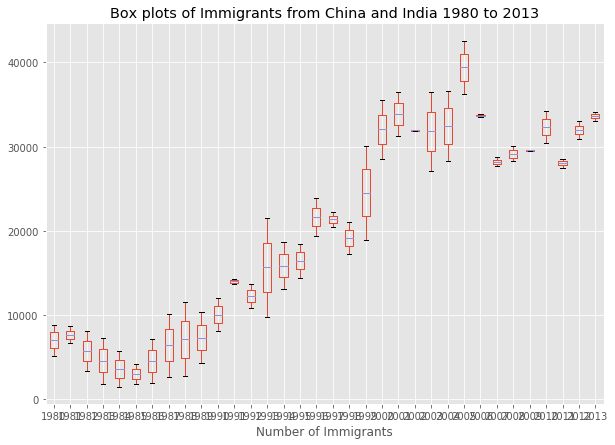

In [64]:
df_CI.plot(kind='box', figsize=(10,7))
plt.title('Box plots of Immigrants from China and India 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.show()

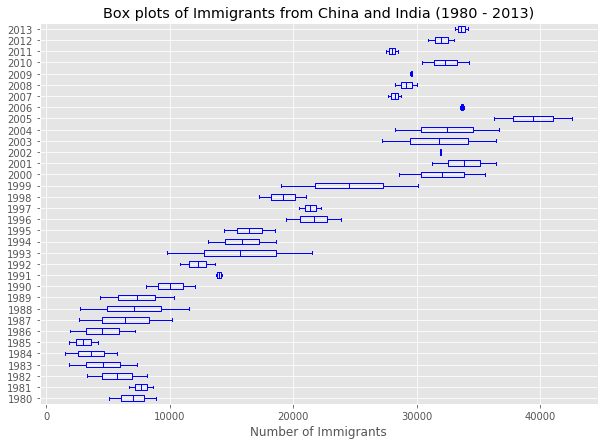

In [65]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()